In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
ames_housing = pd.read_csv('AmesHousing.csv')
ames_housing.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
missing = ames_housing.isna().sum()

In [4]:
ames_housing.shape

(2930, 82)

In [5]:
missing[missing>0]

Lot Frontage       490
Alley             2732
Mas Vnr Type      1775
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64

In [6]:
ames_housing = ames_housing.drop(['Alley', 'Pool QC', 'Fence', 'Misc Feature', 'Fireplace Qu', 'Mas Vnr Type'], axis=1)

In [7]:
ames_housing['Lot Frontage'].fillna(ames_housing['Lot Frontage'].median(), inplace=True)

In [8]:
ames_housing.dropna(subset='Electrical', inplace=True)

In [9]:
ames_housing['Mas Vnr Area'].fillna(ames_housing['Mas Vnr Area'].mean(), inplace=True)

## Filling Missing Value with sklearn

In [10]:
missed = ames_housing.isna().sum()
missed[missed>0].head()

Bsmt Qual         80
Bsmt Cond         80
Bsmt Exposure     83
BsmtFin Type 1    80
BsmtFin SF 1       1
dtype: int64

In [11]:
from sklearn.impute import SimpleImputer
cat_imputer = SimpleImputer(strategy='most_frequent')
num_imputer = SimpleImputer(strategy = 'mean')

In [12]:
num_category = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Yr Blt', 'Garage Area']
text_category = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Garage Type', 'Garage Finish', 'Garage Cars',  'Garage Qual', 'Garage Cond', 'Sale Type', 'Sale Condition'] 

In [13]:
from sklearn.compose import ColumnTransformer
filled = ColumnTransformer([('Categorical_Conversion', cat_imputer, text_category),
                            ('Numerical_Conversion', num_imputer, num_category)],
                           remainder='passthrough')
filled_data = filled.fit_transform(ames_housing)

## Getting name of the columns 

In [14]:
transformed_columns = text_category+num_category
remainder_columns = [col for col in ames_housing.columns if col not in transformed_columns]
final_columns = transformed_columns+remainder_columns

In [15]:
ames_housing_filled = pd.DataFrame(filled_data, columns=final_columns)

## Change the order of columns according to the original ames_housing DataFrame

In [16]:
ames_housing_filled_df = ames_housing_filled[ames_housing.columns]
ames_housing_filled_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,189900


In [17]:
x = ames_housing_filled_df.drop('SalePrice', axis=1)
y = ames_housing_filled_df['SalePrice']

In [18]:
ames_housing_filled_df['Price_per_sqft'] = ames_housing_filled_df['SalePrice']/ames_housing_filled_df['Gr Liv Area']
ames_housing_filled_df['TotalBaths'] = ames_housing_filled_df['Full Bath'] + (ames_housing_filled_df['Half Bath']*0.5)

In [28]:
## Getting all text category
all_cat_columns = [col for col in ames_housing_filled_df.columns if ames_housing_filled_df[col].apply(lambda x: isinstance(x, str)).all()]

## Changing categorical variables to numeric variables using get_dummies() method

In [31]:
get_dummies = pd.get_dummies(ames_housing_filled_df, drop_first=True, columns=all_cat_columns).astype(int)
get_dummies.head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,1,526301100,20,141,31770,6,5,1960,1960,112,...,0,0,0,0,1,0,0,0,1,0
1,2,526350040,20,80,11622,5,6,1961,1961,0,...,0,0,0,0,1,0,0,0,1,0
2,3,526351010,20,81,14267,6,6,1958,1958,108,...,0,0,0,0,1,0,0,0,1,0
3,4,526353030,20,93,11160,7,5,1968,1968,0,...,0,0,0,0,1,0,0,0,1,0
4,5,527105010,60,74,13830,5,5,1997,1998,0,...,0,0,0,0,1,0,0,0,1,0


## Changing categorical variables to numeric variables using sklearn library

In [39]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
one_hot_encoder = OneHotEncoder()
transformer = ColumnTransformer([('Categorical_Transformer',
                                one_hot_encoder,
                                all_cat_columns)],
                                remainder ='passthrough')
transformed = transformer.fit_transform(x)

In [47]:
final_df = pd.DataFrame(transformed.toarray())

## Selecting small portion of data or table using sample() function

In [86]:
row = final_df.sample(n=100, random_state=42)
cols = np.random.choice(final_df.columns, size=20, replace=False)
sns_heatmap = row[cols]
sns_heatmap.head()

,2,254,75,47,105,160,225,88,76,270,165,251,219,156,85,110,125,66,205,20
1472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2003.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2006.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2005.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1992.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1963.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Selecting small portion of data or table using iloc() function

In [85]:
table_data = final_df.iloc[:200, :20]
table_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


## Finding correlation and correlation heatmap

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

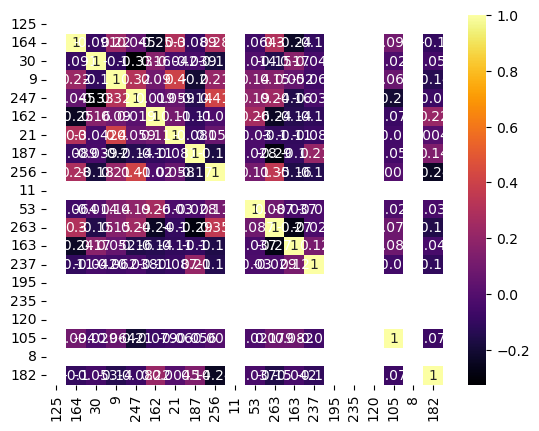

In [64]:
sns.heatmap(sns_heatmap.corr(), annot=True, cmap='inferno')
plt.show()

## SalesPrice Distribution

<Axes: ylabel='Frequency'>

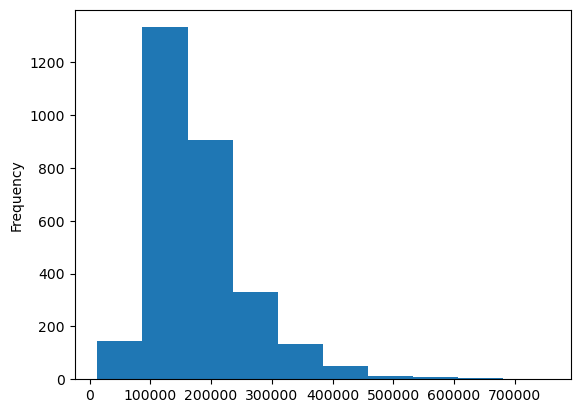

In [66]:
ames_housing_filled_df['SalePrice'].plot.hist()

Text(0.5, 1.0, 'Distribution os Sales Prices')

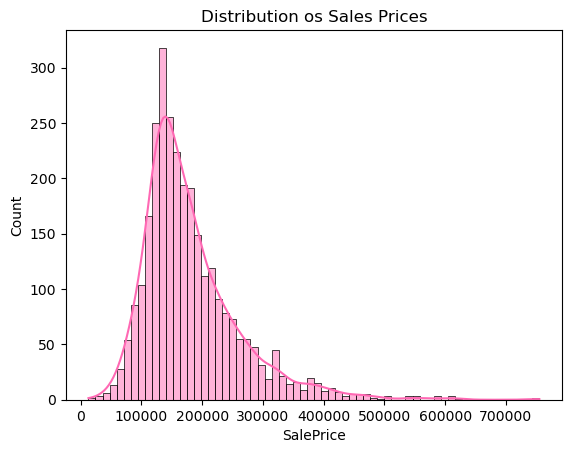

In [150]:
sns.histplot(ames_housing_filled_df['SalePrice'], kde=True, color='hotpink') #kde=Kernel Density Estimate (Curve)
plt.title('Distribution os Sales Prices')

## Select features with high correlation with SalePrice

In [82]:
corr = get_dummies.corr()['SalePrice'].sort_values(ascending=False)
corr.head()

SalePrice       1.000000
Overall Qual    0.799304
Gr Liv Area     0.706777
Garage Cars     0.647842
Garage Area     0.640382
Name: SalePrice, dtype: float64

## Creating ML model

In [84]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [130]:
predictors = ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'TotalBaths', 'Year Built']
x = get_dummies[predictors]
y = get_dummies['SalePrice']

In [132]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.9756317877847411

In [133]:
model.score(X_test, y_test)

0.8465531161173385

In [134]:
y_pred = model.predict(X_test)

In [135]:
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

31743.357455421934

In [136]:
r2 = round(r2_score(y_test, y_pred),2)
r2

0.85

## Hyperparameter Tuning using GridSearchCV() method

In [137]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators':[100, 200, 300],
    'max_depth':[10, 20, 30],
    'min_samples_split':[2, 5, 10]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=   0.6s
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=   0.6s
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=   0.6s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_split=5, n_es

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [138]:
best_model = grid_search.best_estimator_
print('Best Model: ',best_model, 'Best Parameters: ', grid_search.best_params_)

Best Model:  RandomForestRegressor(max_depth=10, min_samples_split=10) Best Parameters:  {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}


## Feature Importance

In [139]:
importances = best_model.feature_importances_
importance_df = pd.DataFrame({'Features': predictors, 'Importance':importances})

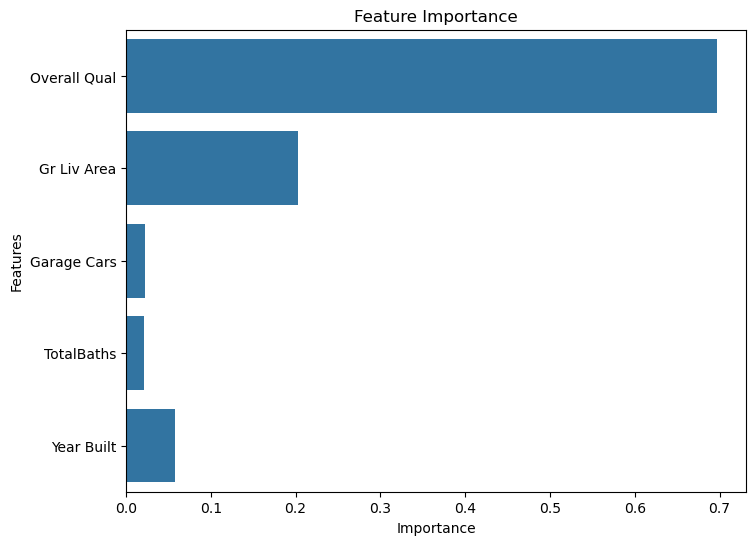

In [140]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Features', data=importance_df)
plt.title('Feature Importance')
plt.show()

## Scatter plot for y_test and y_pred

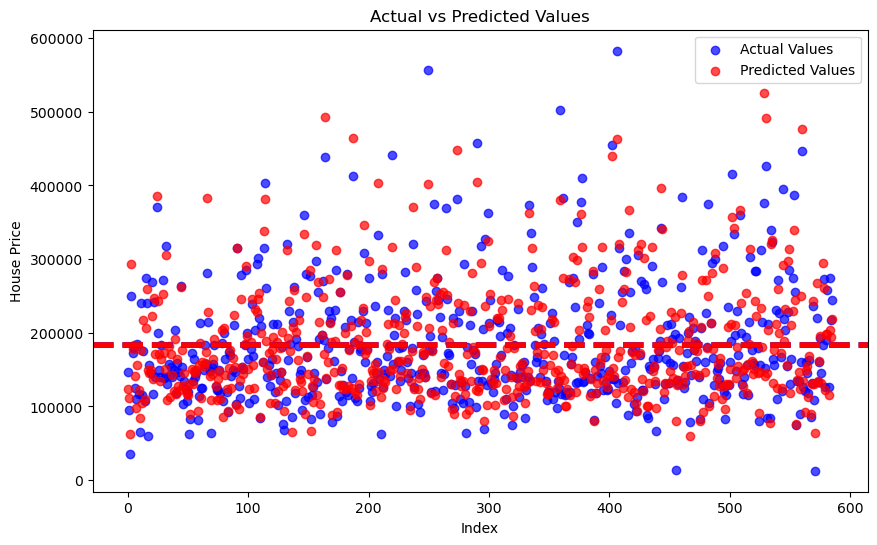

In [146]:
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, alpha=0.7, label='Actual Values', color='blue')
plt.axhline(y_test.mean(), ls='--', lw=4, color='blue')
plt.scatter(range(len(y_pred)), y_pred, alpha=0.7, label='Predicted Values', color='red')
plt.axhline(y_pred.mean(), ls='--', lw=4, color='red')
plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('House Price')
plt.legend()
plt.show()

## Line plot for y_test and y_pred

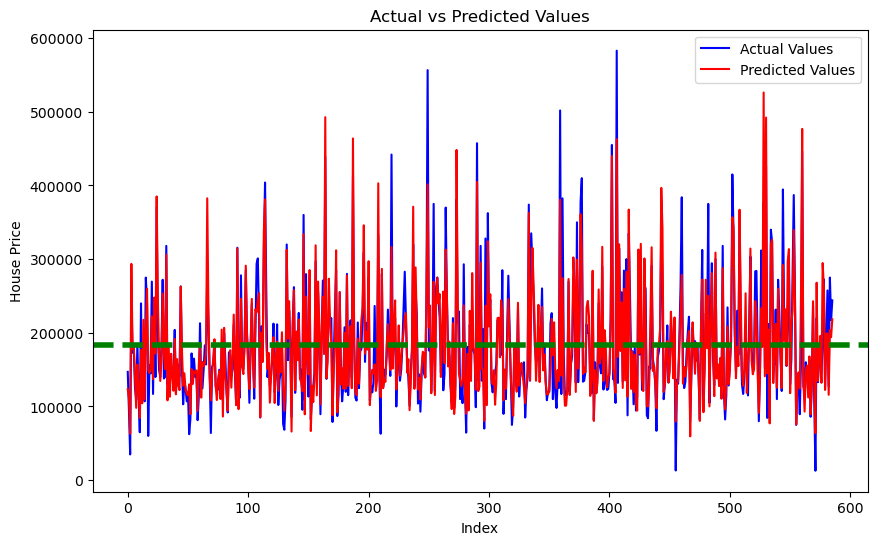

In [149]:
plt.figure(figsize=(10,6))
plt.plot(range(len(y_test)), y_test, label='Actual Values', color='blue', ls='solid')
plt.plot(range(len(y_pred)), y_pred, label='Predicted Values', color='red')
plt.axhline(y_pred.mean(), ls='--', lw=4, color='green')
plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('House Price')
plt.legend()
plt.show()